<a href="https://colab.research.google.com/github/celelunar/Flower-Images-CNN-Classification/blob/main/CNN%20Image%20Classification%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Diva Nabila Henryka
<br> NIM: 2501975620


---

#**MID TEST - NUMBER 02**
###**Image Classification using CNN**

In [ ]:
# Import needed libraries
import os

import pprint
import glob as gb
import pandas as pd
from PIL import Image
from skimage import io
from collections import Counter
import matplotlib.pyplot as plt

import numpy as np
from numpy import expand_dims

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import preprocess_input

from google.colab import drive

## Dataset

Since I have an even number student's ID, I will use the Data_B.zip for this code. This image dataset is consisted of 2 classes, Anemone Dahlias and Ball Dahlias and it's already splitted into 3 parts, train, test, and val.

To use the data, I'll be utilizing Google Drive to store the unzipped data and then importing it to this Google Colab by mounting my whole Google Drive. After that I'll be acccessing the dataset by first set the path for each folders.

Reference:
1. https://www.kaggle.com/code/heshamasem/image-classification-by-cnn
2. https://colab.research.google.com/drive/1lCoElFBt9_f7TIltUx-MXyti17JuuNxf?usp=sharing (code from session 13)

In [ ]:
# Mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Path for testing, training, and validation dataset
train_path = "/content/gdrive/MyDrive/Data_B/train"
test_path = "/content/gdrive/MyDrive/Data_B/test"
val_path = "/content/gdrive/MyDrive/Data_B/val"

In [ ]:
# Printing out the classes name
pd.DataFrame(os.listdir(train_path), columns=["Files_Name"])

,Files_Name
0,Ball Dahlias
1,Anemone Dahlias


### Input each image folders into a data frame
---
I'll also be shuffling the images as to reducing order bias, promoting generalization to the NN, and improving regularization by introducing randomness in to the order of the dataset.

Reference:
1. https://www.quora.com/What-is-the-purpose-of-shuffling-the-training-data-before-feeding-it-into-a-neural-network#
2. https://colab.research.google.com/drive/1lCoElFBt9_f7TIltUx-MXyti17JuuNxf?authuser=1 (code from session 13)

In [ ]:
# Train Dataframe
files = [i for i in gb.glob(train_path+"//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
train_df = pd.DataFrame(data, columns=["Image", "Label"])

In [ ]:
# Test Dataframe
files = [i for i in gb.glob(test_path+"//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
test_df = pd.DataFrame(data, columns=["Image", "Label"])

In [ ]:
# Validation Dataframe
files = [i for i in gb.glob(val_path+"//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
val_df = pd.DataFrame(data, columns=["Image", "Label"])

In [ ]:
# Printing the number of images in each folder
print("Training set: ", len(train_df))
print("Val set: ", len(val_df))
print("Test set: ", len(test_df))

Training set:  167
Val set:  40
Test set:  40


### Visualize images
---
This step is just for printing the images as visualization of the dataset used.
<br>
References:
1. https://www.analyticsvidhya.com/blog/2019/09/9-powerful-tricks-for-working-image-data-skimage-python/
2. https://scikit-image.org/docs/stable/auto_examples/data/plot_specific.html

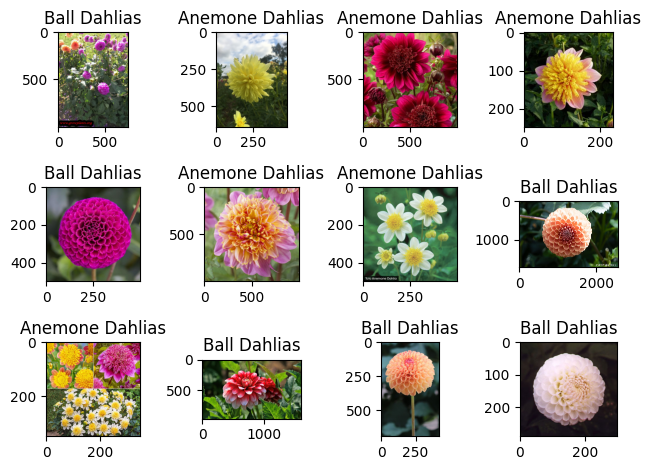

In [ ]:
countx = 0
county = 0
i = 0

fig,axs = plt.subplots(3,4)
for i in range(0,12):
    label = train_df['Label'][i]

    if(i%4 == 0):
      countx = 0

    img = io.imread(train_df['Image'][i])
    axs[i//4][countx].set_title(label)
    axs[i//4][countx].imshow(img)
    countx = countx + 1

fig.tight_layout()

## Data Augmentation


### a. Perform data augmentation and resize the image into 224 x 224
---
It is imporant to perform augmentation to our dataset as it enhances our model performance by protecting it from overfitting.

References:
1. https://medium.com/analytics-vidhya/data-augmentation-is-it-really-necessary-b3cb12ab3c3f
2. https://abderhasan.medium.com/training-a-cnn-from-scratch-with-data-augmentation-for-melanoma-detection-using-keras-37d9381720a1 (the code is in their github repo)
3. https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5
4. https://colab.research.google.com/drive/1M9clI1z9hJCYTIvmLhA089vjw1ek1NAe?authuser=1#scrollTo=MZAAx9LNRqpl (code from session 13)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale= 1./255)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
# Define the target size
image_height, image_width = 224, 224

# Define batch size
# 32 since it is common to use a batch size of 32 multiples
batch = 32

In [ ]:
# Training images
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = "Image",
    y_col = "Label",
    target_size= (image_height, image_width),
    batch_size = batch,
    class_mode= "categorical")

# Testing images
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "Image",
    y_col = "Label",
    target_size= (image_height, image_width),
    batch_size = batch,
    class_mode= "categorical")

# Validation images
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col = "Image",
    y_col = "Label",
    target_size= (image_height, image_width),
    batch_size = batch,
    class_mode= "categorical")

Found 167 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.


## Benchmark Model



### b. Create the CNN model based on Figure 1
---
I'll be employing the Keras' Sequential Model to make the model for this dataset as it is the easiest way. The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

Reference:
1. https://towardsdatascience.com/introduction-to-deep-learning-with-keras-17c09e4f0eb2

Step by step:
1.   Create an empty sequential model as the base.
2.   Create a convolutional layer, to extract features from the input dataset. Using the pre-determined neuron, kernel size, and strides.
3. Create an Activation layer, to add non-linearity to the network. Following the instruction, I'll be using "ReLu" for all activation layer except the last one that will use "softmax"
4. Create Pooling layer, to reduce the size of volume which makes the computation fast reduces memory and also prevents overfitting. Here we'll use a MaxPooling2D as it is often used for object recognition tasks.
5. Redo the 2-4 steps, but following the figure 1.
6. Create Flattening layer to convert feature maps into  a one-dimensional vector after the convolution and pooling layers so they can be passed into a completely linked layer for categorization or regression.



References:
1. https://github.com/eweill/keras-deepcv/blob/master/models/classification/alexnet.py
2. https://stackoverflow.com/questions/55694721/how-to-specify-padding-with-keras-in-conv2d-layer


In [ ]:
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(256, kernel_size=(5,5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(384, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(384, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [ ]:
# Data modelling
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["accuracy", "Precision", "Recall"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

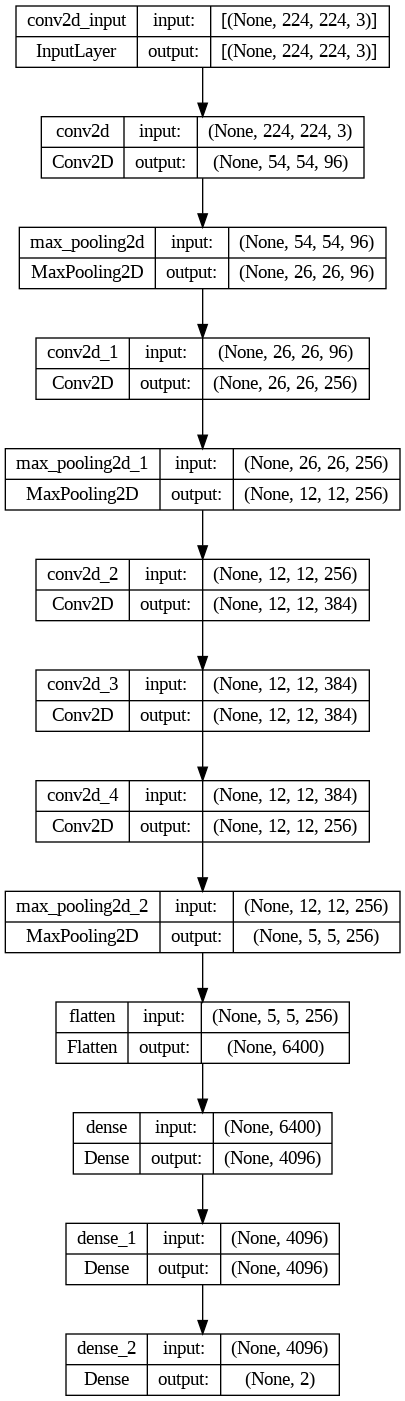

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Early stopping
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=4
                             )
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.00001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
# Fitting the model
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.samples // batch,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch,
    callbacks = callbacks
    )

<ipython-input-18-bda9294e7be2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.4313 - precision: 0.4313 - recall: 0.4313
Epoch 1: val_loss improved from inf to 0.69674, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 25s 1s/step - loss: 0.7225 - accuracy: 0.4313 - precision: 0.4313 - recall: 0.4313 - val_loss: 0.6967 - val_accuracy: 0.4688 - val_precision: 0.4688 - val_recall: 0.4688 - lr: 1.0000e-04
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4963 - precision: 0.4963 - recall: 0.4963
Epoch 2: val_loss improved from 0.69674 to 0.69259, saving model to model.h5
5/5 [==============================] - 10s 2s/step - loss: 0.6933 - accuracy: 0.4963 - precision: 0.4963 - recall: 0.4963 - val_loss: 0.6926 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 1.0000e-04
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5259 - precision: 0.5259 - recall: 0.5259
Epoch 3: val_loss did not improve from 0.69259
5/5 [==============================] - 8s 2s/step - loss: 0.6927 - accuracy: 0.5259 - precision: 0.5259 - recall: 0.5259 - val_loss: 0.6936 - val_accuracy: 0.4688 - v

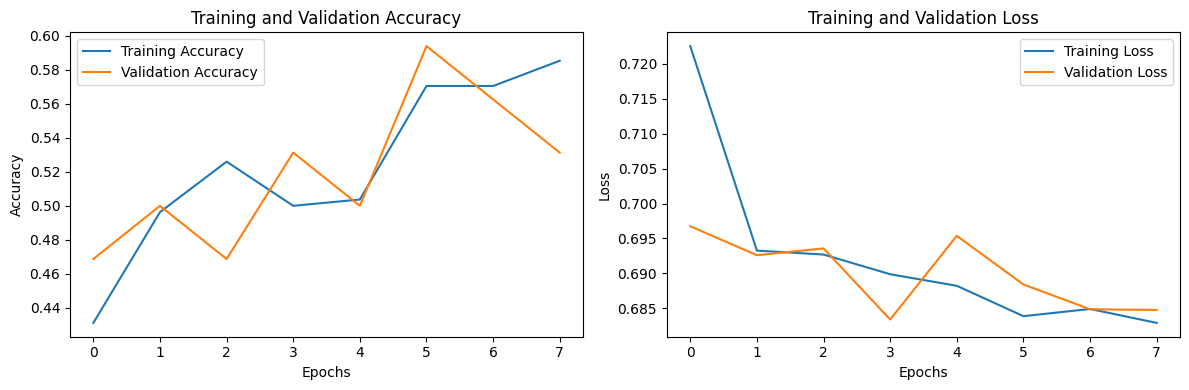

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
print(f"Test Loss: {test_loss * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")

2/2 [==============================] - 1s 486ms/step - loss: 0.6798 - accuracy: 0.5750 - precision: 0.5750 - recall: 0.5750
Test Loss: 67.98%
Test Accuracy: 57.50%
Test Precision: 57.50%
Test Recall: 57.50%


As we can see from the graph above that our model is fairly a good fit, but we can make it better by minimizing the loss.

## c. Architecture Modification

### First Modification
---


Change the architecture from AlexNet to LeNet-5. I'm choosing this one first as LeNet-5 is like the "Hello World" of CNN, it's classic, simple, straightforward to understand.

References:
1. https://medium.datadriveninvestor.com/lenet-5-a-classic-cnn-architecture-c87d0b03560d
2. https://medium.com/analytics-vidhya/lenet-architecture-document-recognition-ed971ab2a23f

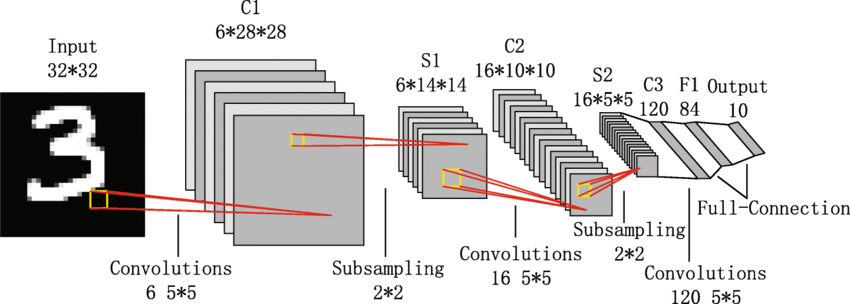

In [ ]:
mod1 = Sequential()
mod1.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(224, 224, 3)))
mod1.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))
mod1.add(Conv2D(6, kernel_size = (5,5), strides = (1,1), activation = 'tanh'))
mod1.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))
mod1.add(Flatten())
mod1.add(Dense(units = 120, activation = 'tanh'))
mod1.add(Dense(units = 84, activation = 'tanh'))
mod1.add(Dense(units = 2, activation = 'softmax'))

mod1.compile(optimizer = 'sgd',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy", "Precision", "Recall"])

hist1 = mod1.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.samples // batch,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch,
    callbacks = callbacks
    )

<ipython-input-21-1e6d7a4628b3>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1 = mod1.fit_generator(


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 1.8639 - accuracy: 0.5185 - precision: 0.5185 - recall: 0.5185
Epoch 1: val_loss did not improve from 0.68338
5/5 [==============================] - 7s 1s/step - loss: 1.8639 - accuracy: 0.5185 - precision: 0.5185 - recall: 0.5185 - val_loss: 1.3617 - val_accuracy: 0.5312 - val_precision: 0.5312 - val_recall: 0.5312 - lr: 0.0100
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.8564 - accuracy: 0.5037 - precision: 0.5037 - recall: 0.5037
Epoch 2: val_loss did not improve from 0.68338
5/5 [==============================] - 6s 1s/step - loss: 0.8564 - accuracy: 0.5037 - precision: 0.5037 - recall: 0.5037 - val_loss: 0.6999 - val_accuracy: 0.4688 - val_precision: 0.4688 - val_recall: 0.4688 - lr: 0.0100
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.5704 - precision: 0.5704 - recall: 0.5704
Epoch 3: val_loss did not improve from 0.68338
5/5 [=========================

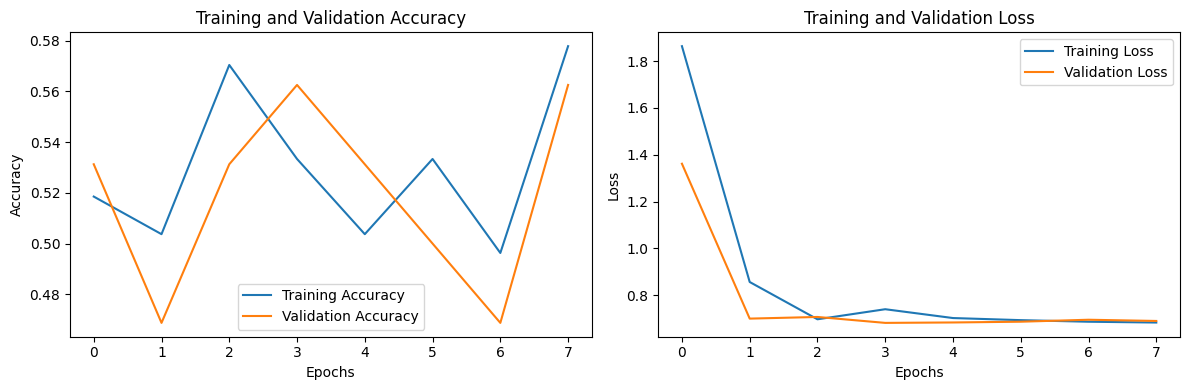

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist1.history['accuracy'], label='Training Accuracy')
plt.plot(hist1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist1.history['loss'], label='Training Loss')
plt.plot(hist1.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss1, test_accuracy1, test_precision1, test_recall1 = mod1.evaluate(test_generator)
print(f"Test Loss: {test_loss1 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy1 * 100:.2f}%")
print(f"Test Precision: {test_precision1 * 100:.2f}%")
print(f"Test Recall: {test_recall1 * 100:.2f}%")

2/2 [==============================] - 1s 133ms/step - loss: 0.6743 - accuracy: 0.6000 - precision: 0.6000 - recall: 0.6000
Test Loss: 67.43%
Test Accuracy: 60.00%
Test Precision: 60.00%
Test Recall: 60.00%


### Second Modification
---
The second modification will be taking inspirations from one of the most popular SOTA out there, VGG16. VGG16 uses 3 3x3 convolutions kernel, but here I will be changing it to 9 convolutions kernel.

References:
1. https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide

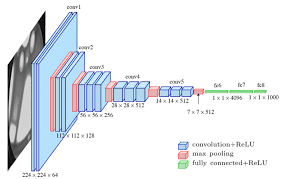

In [ ]:
mod2 = Sequential()
mod2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224, 224, 3)))
mod2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(MaxPooling2D(2,2))

mod2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(MaxPooling2D(2,2))

mod2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(MaxPooling2D(2,2))

mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(MaxPooling2D(2,2))

mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
mod2.add(MaxPooling2D(2,2))

mod2.add(Dropout(0.2))
mod2.add(Flatten())
mod2.add(Dense(4096, activation="relu"))
mod2.add(Dense(4096, activation="relu"))
mod2.add(Dense(2, activation="sigmoid"))

In [ ]:
mod2.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy", "Precision", "Recall"])

hist2 = mod2.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.samples // batch,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch,
    callbacks = callbacks
    )

<ipython-input-25-71544d4bd136>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2 = mod2.fit_generator(


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 3.5149 - accuracy: 0.5111 - precision: 0.5077 - recall: 0.4889
Epoch 1: val_loss did not improve from 0.68164
5/5 [==============================] - 26s 4s/step - loss: 3.5149 - accuracy: 0.5111 - precision: 0.5077 - recall: 0.4889 - val_loss: 0.7327 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 0.3750 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.6995 - accuracy: 0.4889 - precision: 0.4889 - recall: 0.4889
Epoch 2: val_loss did not improve from 0.68164
5/5 [==============================] - 5s 1s/step - loss: 0.6995 - accuracy: 0.4889 - precision: 0.4889 - recall: 0.4889 - val_loss: 0.6934 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5333 - precision: 0.5333 - recall: 0.5333
Epoch 3: val_loss did not improve from 0.68164
5/5 [========================

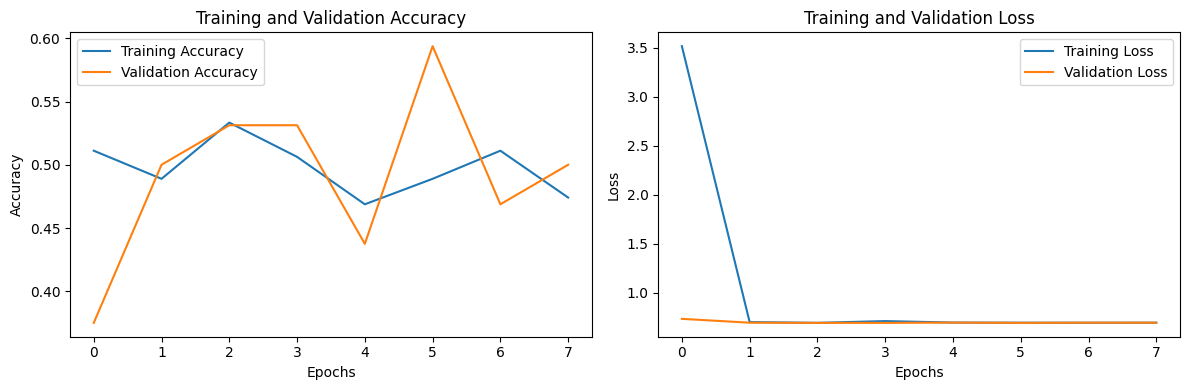

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'], label='Training Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist2.history['loss'], label='Training Loss')
plt.plot(hist2.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss2, test_accuracy2, test_precision2, test_recall2 = mod2.evaluate(test_generator)
print(f"Test Loss: {test_loss2 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy2 * 100:.2f}%")
print(f"Test Precision: {test_precision2 * 100:.2f}%")
print(f"Test Recall: {test_recall2 * 100:.2f}%")

2/2 [==============================] - 2s 1s/step - loss: 0.6936 - accuracy: 0.4750 - precision: 0.4750 - recall: 0.4750
Test Loss: 69.36%
Test Accuracy: 47.50%
Test Precision: 47.50%
Test Recall: 47.50%


### Third Modification
---
For the third modification, I would like to do a simple architecure based on the reference. Though, I will be trying different activation functions.

References:
1. https://medium.com/@mahdis.pw/bee-image-classification-using-a-cnn-and-keras-5fd5ed90a37b

In [ ]:
mod3 = Sequential()
mod3.add(Conv2D(32, kernel_size = (7, 7), activation = "sigmoid", input_shape = (224, 224, 3)))

mod3.add(Conv2D(32, kernel_size = (7, 7), activation = "sigmoid", padding = "same"))
mod3.add(MaxPooling2D(2, 2))
mod3.add(Dropout(0.25))

mod3.add(Conv2D(48, kernel_size = (5, 5), activation = "sigmoid", padding = "same"))
mod3.add(Conv2D(48, kernel_size = (5, 5), activation = "sigmoid", padding = "same"))
mod3.add(MaxPooling2D(2, 2))
mod3.add(Dropout(0.25))

mod3.add(Conv2D(64, kernel_size = (3, 3), activation = "sigmoid", padding = "same"))
mod3.add(Conv2D(64, kernel_size = (3, 3), activation = "sigmoid", padding = "same"))
mod3.add(MaxPooling2D(2, 2))
mod3.add(Dropout(0.25))

mod3.add(Flatten())
mod3.add(Dense(256, activation = "sigmoid"))
mod3.add(Dropout(0.5))

mod3.add(Dense(64, activation = "sigmoid"))
mod3.add(Dropout(0.5))

mod3.add(Dense(2, activation = "sigmoid"))

In [ ]:
mod3.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy", "Precision", "Recall"])

hist3 = mod3.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.samples // batch,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch,
    callbacks = callbacks
    )

<ipython-input-29-476d3a122547>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist3 = mod3.fit_generator(


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.5407 - precision: 0.5122 - recall: 0.7778
Epoch 1: val_loss did not improve from 0.68164
5/5 [==============================] - 15s 1s/step - loss: 0.8117 - accuracy: 0.5407 - precision: 0.5122 - recall: 0.7778 - val_loss: 0.6967 - val_accuracy: 0.4375 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.8017 - accuracy: 0.5259 - precision: 0.5000 - recall: 0.8000
Epoch 2: val_loss improved from 0.68164 to 0.68008, saving model to model.h5
5/5 [==============================] - 6s 1s/step - loss: 0.8017 - accuracy: 0.5259 - precision: 0.5000 - recall: 0.8000 - val_loss: 0.6801 - val_accuracy: 0.5938 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.5333 - precision: 0.5130 - recall: 0.8741
Epoch 3: val_loss did not improve from 0.68008

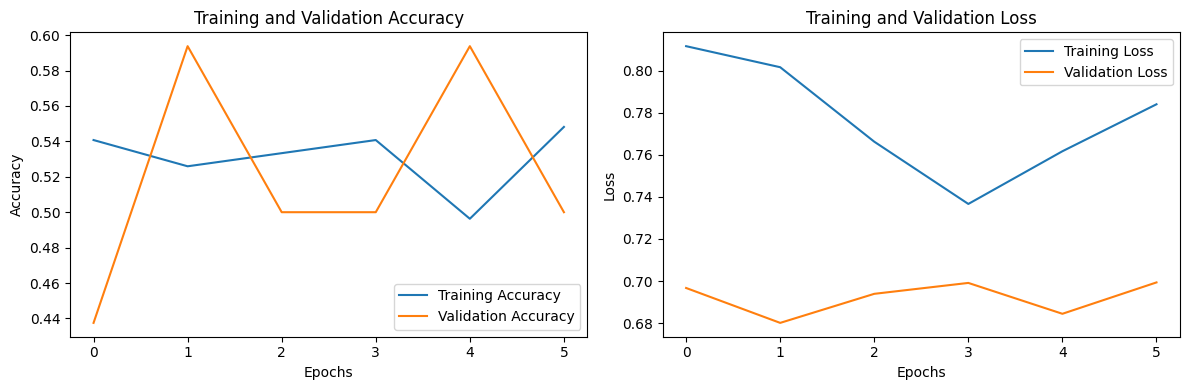

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist3.history['accuracy'], label='Training Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist3.history['loss'], label='Training Loss')
plt.plot(hist3.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss3, test_accuracy3, test_precision3, test_recall3 = mod3.evaluate(test_generator)
print(f"Test Loss: {test_loss3 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy3 * 100:.2f}%")
print(f"Test Precision: {test_precision3 * 100:.2f}%")
print(f"Test Recall: {test_recall3 * 100:.2f}%")

2/2 [==============================] - 1s 1s/step - loss: 0.7049 - accuracy: 0.4750 - precision: 0.5000 - recall: 1.0000
Test Loss: 70.49%
Test Accuracy: 47.50%
Test Precision: 50.00%
Test Recall: 100.00%


If I could pick one as the best out of all three modifications, it will be the first model. But even so, it's not clear if it's better or not than the benchmark.

## d. Evaluation Architecture Modification

References:
1. https://medium.com/analytics-vidhya/beginner-level-introduction-to-three-keras-model-apis-24a45f7af3c9
2. https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

### Benchmark architecture
---

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
print(f"Test Loss: {test_loss * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")

2/2 [==============================] - 0s 68ms/step - loss: 0.6798 - accuracy: 0.5750 - precision: 0.5750 - recall: 0.5750
Test Loss: 67.98%
Test Accuracy: 57.50%
Test Precision: 57.50%
Test Recall: 57.50%


Accuracy:
<br> The overall accuracy of the model is 57.5% which means that the model prediction is correct around 57.5%.

<br>

Precision:
<br> Out of all images predicted as a class, around 57.5% are actually a part of that class.

<br>

Recall:
<br> Out of all images a part of a class, around 57.5% are predicted to be that class.

### Modified architecture
---

In [ ]:
test_loss1, test_accuracy1, test_precision1, test_recall1 = mod1.evaluate(test_generator)
print(f"Test Loss: {test_loss1 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy1 * 100:.2f}%")
print(f"Test Precision: {test_precision1 * 100:.2f}%")
print(f"Test Recall: {test_recall1 * 100:.2f}%")

2/2 [==============================] - 0s 71ms/step - loss: 0.6743 - accuracy: 0.6000 - precision: 0.6000 - recall: 0.6000
Test Loss: 67.43%
Test Accuracy: 60.00%
Test Precision: 60.00%
Test Recall: 60.00%


Accuracy:
<br> The overall accuracy of the model is 60% which means that the model prediction is correct around 60%.

<br>

Precision:
<br> Out of all images predicted as a class, around 60% are actually a part of that class.

<br>

Recall:
<br> Out of all images a part of a class, around 60% are predicted to be that class.